In [1]:
import os
import h5py
import numpy as np
import pandas as pd
import scipy.stats
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
# class RunParameters:
#     '''classe che gestisce i parametri della run'''
    
#     def __init__(self, out_dir: str, ndir=0, ntoy=40, magic=0):
#         '''init: imposto il nome della cartella di output, genero il nome della cartella contenente il file e cerco il file'''
        
#         # output directory
#         self.out_dir = out_dir
#         # entro nella output directory e dentro alla cartella con il numero magico del toy
#         # prendo come folder_name il nome della cartella indicizzata da ndir
#         self.folder_name = os.listdir(self.out_dir+f'/{magic}/')[ndir]
#         # costruisco il nome del file contenente i t
#         self.fname = [name for name in os.listdir(self.out_dir+f'/{magic}/'+self.folder_name) if f'_toy{ntoy}_t.txt' in name][0]
        
#         return
    
#     def fetch_parameters(self) -> list:
#         '''uso il nome del file e della cartella per estrarre i parametri della run'''
        
#         # estrazione dei parametri della run da fname e folder_name
#         self.check_point_t = int(self.fname.split("patience", 1)[1].split("_", 1)[0])
#         self.toys = int(self.fname.split("toy", 1)[1].split("_", 1)[0])
#         self.ref = (self.fname.split("_")[2]).split("ref")[1]
#         self.bkg = (self.fname.split("_")[3]).split("bkg")[1]
#         self.sig = (self.fname.split("_")[4]).split("sig")[1]
#         self.w_clip = self.folder_name.split('wclip',1)[1]
#         self.latent = int(self.folder_name.split("latent", 1)[1].split("_", 1)[0])
#         self.layers = int(self.folder_name.split("layers", 1)[1].split("_", 1)[0])
#         self.epochs = int(self.folder_name.split('epochs',1)[1].split('_')[0])
        
#         # impacchetto i parametri in una lista da ritornare
#         self.parameters = [self.toys, self.w_clip, self.epochs, self.check_point_t, self.ref, self.bkg, self.sig, self.latent, self.layers]
        
#         return self.parameters
    
#     def print_parameters(self):
#         '''stampo i parametri per controllare corrispondano alla run'''
        
#         print('\nFolder name: ' + self.folder_name)
#         print('File name: ' + self.fname)
        
#         print(f'\nParameters:                                              \
#                         \n Toys:          {self.toys}                      \
#                         \n Latent space:  {self.latent}                    \
#                         \n Layers:        {self.layers}                    \
#                         \n W_clip:        {self.w_clip}                    \
#                         \n Epochs:        {self.epochs}                    \
#                         \n Check_point_t: {self.check_point_t}             \
#                         \n Ref, Bkg, Sig: {self.ref} {self.bkg} {self.sig} \n'
#              )
        
#         return  
    
#     def fetch_file(self) -> str:
#         '''genero il nome completo del file contenente il t finale'''
        
#         self.tfile = f'1D_patience{self.check_point_t}_ref{self.ref}_bkg{self.bkg}_sig{self.sig}\
#         _epochs{self.epochs}_latent{self.latent}_layers{self.layers}_wclip{self.w_clip}\
#         /1D_patience{self.check_point_t}_ref{self.ref}_bkg{self.bkg}_sig{self.sig}_toy{self.toys}_t.txt'
        
#         # tolgo gli spazi vuoti che vengono automaticamente inseriti andando a capo con \
#         self.tfile = self.tfile.replace(' ', '')
        
#         return self.tfile
    
#     def fetch_history(self) -> str:
#         '''genero il nome completo del file contenente il t per ogni checkpoint'''
        
#         self.thistory = f'1D_patience{self.check_point_t}_ref{self.ref}_bkg{self.bkg}_sig{self.sig}\
#         _epochs{self.epochs}_latent{self.latent}_layers{self.layers}_wclip{self.w_clip}\
#         /1D_patience{self.check_point_t}_ref{self.ref}_bkg{self.bkg}_sig{self.sig}_toy{self.toys}_history{self.check_point_t}.h5'
        
#         # tolgo gli spazi vuoti che vengono automaticamente inseriti andando a capo con \
#         self.thistory = self.thistory.replace(' ', '')
        
#         return self.thistory

In [4]:
class RunParameters:
    '''classe che gestisce i parametri della run'''
    
    def __init__(self, out_dir: str, ndir=0, ntoy=40, magic=0):
        '''init: imposto il nome della cartella di output, genero il nome della cartella contenente il file e cerco il file'''
        
        # output directory
        self.out_dir = out_dir
        # entro nella output directory e dentro alla cartella con il numero magico del toy
        # prendo come folder_name il nome della cartella indicizzata da ndir
        self.folder_name = os.listdir(self.out_dir+f'/{magic}/')[ndir]
        # costruisco il nome del file contenente i t
        self.fname = [name for name in os.listdir(self.out_dir+f'/{magic}/'+self.folder_name) if name.endswith('_t.txt')][0]
        
        return
    
    def fetch_parameters(self) -> list:
        '''uso il nome del file e della cartella per estrarre i parametri della run'''
        
        # estrazione dei parametri della run da fname e folder_name
        self.epochs = int( (self.folder_name.split("E", 1)[1]).split('_')[0] )
        self.latent = int( (self.folder_name.split("latent", 1)[1]).split("_", 1)[0] )
        self.layers = int( (self.folder_name.split("layers", 1)[1]).split("_", 1)[0] )
        self.w_clip = (self.folder_name.split("wclip", 1)[1]).split("_", 1)[0]
        self.toys = int( (self.folder_name.split("toy", 1)[1]).split("_", 1)[0] )
        self.ref = int( (self.folder_name.split("ref", 1)[1]).split("_", 1)[0] )
        self.bkg = int( (self.folder_name.split("bkg", 1)[1]).split("_", 1)[0] )
        self.sig = int( (self.folder_name.split("sig", 1)[1]).split("_", 1)[0] )
        self.check_point_t = int( (self.folder_name.split("patience", 1)[1]).split("_", 1)[0] )
  
        # impacchetto i parametri in una lista da ritornare
        self.parameters = [self.toys, self.w_clip, self.epochs, self.check_point_t, self.ref, self.bkg, self.sig, self.latent, self.layers]
        
        return self.parameters
    
    def print_parameters(self):
        '''stampo i parametri per controllare corrispondano alla run'''
        
        print('\nFolder name: ' + self.folder_name)
        print('File name: ' + self.fname)
        
        print(f'\nParameters:                                              \
                        \n Toys:          {self.toys}                      \
                        \n Latent space:  {self.latent}                    \
                        \n Layers:        {self.layers}                    \
                        \n W_clip:        {self.w_clip}                    \
                        \n Epochs:        {self.epochs}                    \
                        \n Patience:      {self.check_point_t}             \
                        \n Ref, Bkg, Sig: {self.ref} {self.bkg} {self.sig} \n'
             )
        
        return  
    
    def fetch_file(self) -> str:
        '''genero il nome completo del file contenente il t finale'''
        
        self.tfile = (
                        '/E'+str(self.epochs)+'_latent'+str(self.latent)+'_layers'+str(self.layers)
                        +'_wclip'+str(self.w_clip)
                        +'_ntoy'+str(self.toys)+'_ref'+str(self.ref)+'_bkg'+str(self.bkg)+'_sig'+str(self.sig)
                        +'_patience'+str(self.check_point_t)+'_t.txt'
        )
        
        # tolgo gli spazi vuoti che vengono automaticamente inseriti andando a capo con \
        self.tfile = self.tfile.replace(' ', '')
        
        return self.tfile
    
    def fetch_history(self) -> str:
        '''genero il nome completo del file contenente il t per ogni checkpoint'''
        
        self.thistory = (
                        '/E'+str(self.epochs)+'_latent'+str(self.latent)+'_layers'+str(self.layers)
                        +'_wclip'+str(self.w_clip)
                        +'_ntoy'+str(self.toys)+'_ref'+str(self.ref)+'_bkg'+str(self.bkg)+'_sig'+str(self.sig)
                        +'_patience'+str(self.check_point_t)+'_history'+str(self.check_point_t)+'.h5'
        )
        
        # tolgo gli spazi vuoti che vengono automaticamente inseriti andando a capo con \
        self.thistory = self.thistory.replace(' ', '')
        
        return self.thistory

In [5]:
class TDist:
    '''classe che gestisce la distribuzione dei t'''
    
    def __init__(self, dof, bins, toys, epochs, check_point_t, out_dir, tfile, thistory, save_flag):
        '''init: imposto parametri importanti della run e i file di interesse'''
        
        self.dof = dof
        self.bins = bins
        self.epochs = epochs
        self.check_point_t = check_point_t
        self.toys = toys
        self.OUT_PATH = out_dir
        self.OUT_FILE_t = tfile
        self.OUT_FILE_t_history = thistory
        self.save_flag = save_flag
        
        return
    
    
    def plotOutPath(self):
        '''costruisco il percorso di salvataggio delle figure'''
        
        path = '/lustre/cmswork/nlai/PLOTS/NPL_1D/MODEL_SELECTION/'
        rPar = RunParameters(self.OUT_PATH, 0, self.toys)
        toys, w_clip, epochs, check_point_t, ref, bkg, sig, latent, layers = rPar.fetch_parameters()
        
        pngfile = f'1D_patience{check_point_t}_ref{ref}_bkg{bkg}_sig{sig}\
        _epochs{epochs}_latent{latent}_layers{layers}_wclip{w_clip}_toy{toys}'
        
        pngfile = pngfile.replace(' ', '')
        
        self.pngpath = path + pngfile
        
        return self.pngpath
    
    
    
    def getT(self):
        '''ciclo su tutti i file per prendere tutti i t e tutte le history'''
        
        # inizializzo le liste
        self.t_list=[]
        self.t_list_history=[]
        
        counter=0
        preview=0
        
        # ciclo su tutti i toy
        for i in range(self.toys-preview):
    
            # entro nella output directory, numero magico del toy i-esimo, e prendo il file t
            file_name = self.OUT_PATH + f'/{i}/' + f'E200000_latent3_layers1_wclip7.0_ntoy{self.toys}_ref200000_bkg10000_sig0_patience1000' + self.OUT_FILE_t # !!!!!!!!!!!!!
            
            # controllo se è effettivamente un file esistente
            if os.path.isfile(file_name):
                # apro il file in read mode
                f = open(file_name, "r")
                # leggo cosa c'è scritto e lo inserisco nella lista
                self.t_list.append(float(f.readline()[:-1]))
                # chiudo il file
                f.close()
#                 print(i)
                # modo stranissimo per dire che se è andato tutto bene allora aumento il counter
                if np.logical_not(np.isnan(self.t_list[-1])):
                    counter += 1
            
            # entro nella output directory, numero magico del toy i-esimo, e prendo il file con la storia di t
            history_name = self.OUT_PATH + f'/{i}/' + f'E200000_latent3_layers1_wclip7.0_ntoy{self.toys}_ref200000_bkg10000_sig0_patience1000' + self.OUT_FILE_t_history # !!!!!!!!!!!!!
            
            # controllo se è effettivamente un file esistente
            if os.path.isfile(history_name):
                # apro il file in read mode
                f = h5py.File(history_name, "r")
                # leggo cosa c'è scritto e lo inserisco nella lista
                try:
                    self.t_list_history.append(-2*np.array(f.get('loss')))
                except: 
                    print('Problem with toy ', i)
                # chiudo il file
                f.close()
        
        # converto in numpy array 
        self.t_list=np.array(self.t_list)
        self.t_list_history=np.array(self.t_list_history)
        
        # rimuovo nan values
        self.t_list = self.t_list[~np.isnan(self.t_list)]
        self.t_list_history = self.t_list_history[~np.isnan(self.t_list_history).any(axis=1), :]
        
#         self.t_list = self.t_list[self.t_list<40]
#         self.t_list_history = self.t_list_history[self.t_list_history[:, -1]<40]
        
        print(f"\nToys at disposal/Total toys: {counter}/{self.toys-preview}")
        
        return 
    
    
    def computeMedian(self):
        '''calcolo la mediana per un rapido controllo di compatibilità'''
        
        # calcolo la mediana della lista
        median_t = np.median(self.t_list)
        print("\nMedian t distribution: ", median_t)
        
        # calcolo il p-value della lista 
        p_list = np.sum([1/(len(self.t_list)) for x in self.t_list if x>median_t])
        print(
            f"Median p-value: {p_list :.4f}\
            Median significance: {scipy.stats.norm.ppf(1-p_list):.4f}\
            from t list"
        )
        
        print(
            f"Median p-value: {scipy.stats.chi2.sf(median_t, df=self.dof):.4f}\
            Median significance: {scipy.stats.norm.ppf(1-scipy.stats.chi2.sf(median_t, df=self.dof)):.4f}\
            from chi2 distribution" 
        ) 
        
        return
    
    
    def change_legend(self, ax, new_loc, fontsize, titlesize, **kws):
        '''funzione per modificare posizione e font size della legenda generata da seaborn'''

        old_legend = ax.legend_
        handles = old_legend.legendHandles
        labels = [t.get_text() for t in old_legend.get_texts()]
        title = old_legend.get_title().get_text()

        ax.legend(handles, labels, loc=new_loc, title=title, 
                  fontsize=fontsize, title_fontsize=titlesize, 
                  frameon = True, fancybox = False, framealpha = 0.5, **kws)
    
        return
    
    def plotterLayout(self, ax, title: str, titlefont: int, xlabel: str, ylabel: str, labelfont: int, xlimits=[], ylimits=[]):
        
        if xlimits:
            ax.set_xlim(xlimits[0], xlimits[1])
        if ylimits:
            ax.set_ylim(ylimits[0], ylimits[1])
            
        ax.set_title(title, fontsize=titlefont)
        
        ax.set_xlabel(xlabel, fontsize = labelfont)
        ax.set_ylabel(ylabel, fontsize = labelfont)
        
        # sistemo i ticks
        ax.tick_params(axis = 'both', which = 'major', labelsize = 14, direction = 'out', length = 5)
        
        return
    
    
    def plotTdist(self):
        '''grafico della distribuzione dei t'''
        
        # gestione del plot range
        XMIN = 0
        if max(self.t_list) >= 3*self.dof:
            XMAX = max(self.t_list) + min(self.t_list) 
        elif max(self.t_list) < 3*self.dof:
            XMAX = 3*self.dof
            
        XLIM = [XMIN, XMAX]
        
        # creo la griglia lungo x
        XGRID = np.linspace(XMIN, XMAX, 500)
        
        # numero di bin da utilizzare
        BINS = self.bins
        
        # fit della distribuzione con un chi2
        fit_par = scipy.stats.chi2.fit(self.t_list, floc=0, fscale=1)
        
        # creo figure&axes
        fig, ax = plt.subplots(figsize=(12,7))
        
        # istogramma della distrubuzione dei t
        ax = sns.histplot(x=self.t_list, bins=BINS, 
                          stat='density', element='bars', fill=True, color='#aadeff', edgecolor='#009cff', 
                          label='t distribution')
        
        # parte di codice per aggiungere l'incertezza ai bin 
        hist, bin_edges = np.histogram(self.t_list, density=True, bins=BINS)
        binswidth = bin_edges[1]-bin_edges[0]
        central_points = []
        for i in range(0, len(bin_edges)-1):
            half = (bin_edges[i] + bin_edges[i+1])/2
            central_points.append(half)
        # calcolo dell'incertezza dei bin
        err = np.sqrt(hist/(self.t_list.shape[0]*binswidth))
        # grafico delle incertezze sui bin 
        ax.errorbar(central_points, hist, yerr = err, color='#009cff', marker='o', ls='')
        
        # grafico della distribuzione teorica del chi2
        ax.plot(XGRID,scipy.stats.chi2.pdf(XGRID, df=self.dof), 
                color='#00FF00', linestyle='solid', linewidth=5, alpha=0.6, 
                label=f'theoretical distribution, dof: {self.dof}')
        
        # grafico del fit della distribuzione 
        ax.plot(XGRID, scipy.stats.chi2.pdf(XGRID, *fit_par), 
                color='#FF0000', linestyle='solid', linewidth=5, alpha=0.6, 
                label=f'fitted chi2, dof: '+format(fit_par[0],'1.4f'))
        
        
        self.plotterLayout(ax=ax, xlimits=XLIM, title='t distribution', titlefont=18, xlabel='t', ylabel='density', labelfont=16)
        
        # gestione della legenda
        ax.legend()
        handles, labels = ax.get_legend_handles_labels()
        ax.legend([handles[idx] for idx in [2, 0, 1]], [labels[idx] for idx in [2, 0, 1]])
        self.change_legend(ax=ax, new_loc="upper right", fontsize=14, titlesize=16)
        
        fig.tight_layout()
        if self.save_flag:
            fig.savefig(self.plotOutPath()+'_distribution.png', dpi = 300, facecolor='white')
        plt.show()
        return 
    
    
    
    
    
    def plotHist(self):
        
        # gestione del plot range
        XMIN = 0
        if max(self.t_list) >= 3*self.dof:
            XMAX = max(self.t_list) + min(self.t_list) 
        elif max(self.t_list) < 3*self.dof:
            XMAX = 3*self.dof
            
        XLIM = [XMIN, XMAX]
        
        # creo la griglia lungo x
        XGRID = np.linspace(XMIN, XMAX, 500)
        
        t_hist, binedges = np.histogram(self.t_list, bins=self.bins, density=False) 
        bincenters = (binedges[:-1] + binedges[1:]) / 2
        bin_width = binedges[1]-binedges[0]
        
        norm = bin_width * self.toys
        
        th_bins_test=[]
        for i in range(len(bincenters)):
            area = scipy.integrate.quad(lambda x: (norm*scipy.stats.chi2.pdf(x, df=self.dof)), binedges[i], binedges[i+1])[0]
#             area = norm*scipy.stats.chi2.sf(binedges[i], df=self.dof) - norm*scipy.stats.chi2.sf(binedges[i+1], df=self.dof)
            th_bins_test.append(area/(bin_width))
    
        th_bins = np.array([norm*scipy.stats.chi2.pdf(b_center, df=self.dof) for b_center in bincenters])
        th_bins_test = np.array(th_bins_test)  
        
        chi2 =  np.sum( (t_hist-th_bins)**2/th_bins, axis=0 ) 
        chi2_test =  np.sum( (t_hist-th_bins_test)**2/th_bins_test, axis=0 ) 
        
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(24,7))
        
        ax1=sns.histplot(x=bincenters, bins=binedges, weights=t_hist,
                            stat='count', element='bars', fill=True, color='#aadeff', edgecolor='#009cff', 
                            label='data distribution', ax=ax1)
        
        ax1=sns.histplot(x=bincenters, bins=binedges, weights=th_bins,
                            stat='count', element='bars', fill=True, color='#ffcdaa', edgecolor='#FF6800', 
                            label='theoretical distribution', ax=ax1)
        
        
        ax1.text(0.75, 0.6, chi2, transform=ax1.transAxes)
        ax2.text(0.75, 0.6, chi2_test, transform=ax2.transAxes)
        
        
        ax2=sns.histplot(x=bincenters, bins=binedges, weights=t_hist,
                            stat='count', element='bars', fill=True, color='#aadeff', edgecolor='#009cff', 
                            label='data distribution', ax=ax2)
        
        ax2=sns.histplot(x=bincenters, bins=binedges, weights=th_bins_test,
                            stat='count', element='bars', fill=True, color='#ffcdaa', edgecolor='#FF6800', 
                            label='theoretical distribution - test', ax=ax2)
        
        
        
        
        
        ax1.plot(XGRID, norm*scipy.stats.chi2.pdf(XGRID, df=self.dof), 
                color='#00FF00', linestyle='solid', linewidth=2, alpha=1)
        ax2.plot(XGRID, norm*scipy.stats.chi2.pdf(XGRID, df=self.dof), 
                color='#00FF00', linestyle='solid', linewidth=2, alpha=1)
    
        
        self.plotterLayout(ax=ax1, xlimits=XLIM, title='', titlefont=18, xlabel='t', ylabel='', labelfont=16)
        self.plotterLayout(ax=ax2, xlimits=XLIM, title='', titlefont=18, xlabel='t', ylabel='', labelfont=16)
        
        ax1.legend()
        ax2.legend()
        fig.tight_layout()
        plt.show()
        return
    

    
    
    def plotChi2History(self):
        '''grafico andamento del chi2 per epoche'''
        
        self.t_chi2_history = []
        bin_number = self.bins 
        
        for counter in range(10, self.t_list_history.shape[1]): 
            # binning della distribuzione dei t per ogni checkpoint
            t_hist, binedges = np.histogram(self.t_list_history[:, counter], bins=bin_number, density=False) 
            # cerco il centro di ciascun bin
            bincenters = (binedges[:-1] + binedges[1:]) / 2
            # calcolo la larghezza dei bin
            bin_width = binedges[1]-binedges[0]
            # calcolo l'area dell'istogrammaW
            area_hist = bin_width*self.toys
            th_bins=[]
            for i in range(len(bincenters)):
                area = scipy.integrate.quad(lambda x: (area_hist*scipy.stats.chi2.pdf(x, df=self.dof)), binedges[i], binedges[i+1])[0]
                th_bins.append(area/(bin_width))
            # calcolo il chi2
            self.t_chi2_history.append( np.sum( (t_hist-th_bins)**2/th_bins, axis=0 ) ) 
    
        XMIN = 0
        XMAX = self.epochs
        
        XLIM = [XMIN, XMAX]

        fig, ax = plt.subplots(figsize=(12,7))

        x_tics = np.array(range(self.epochs))
        x_tics = x_tics[x_tics % self.check_point_t == 0][10:]

        
        ax.plot(x_tics[:], self.t_chi2_history[:], color='#009cff', linestyle='solid', linewidth=3, alpha=1, 
                label=fr'$\chi^2$ final value: {self.t_chi2_history[-1]:.3f}')
        
        self.plotterLayout(ax=ax, xlimits=XLIM, title=r'$\chi^2$ evolution', titlefont=18, xlabel='training epoch', ylabel=r'$\chi^2$', labelfont=16)
        ax.set_yscale('log')
        
        ax.legend()
        self.change_legend(ax=ax, new_loc="upper right", fontsize=14, titlesize=16)
        
        fig.tight_layout()
        if self.save_flag:
            fig.savefig(self.plotOutPath()+'_chi2.png', dpi = 300, facecolor='white')
        plt.show()

        return

In [10]:
WCLIP = 7 # MODIFY THIS FOR CHANGING DIRECTORY
NTOYS = 150

EPOCHS = '200k'
JOB = '_hstat' # '_hstat'

# DATA_FOLDER = '/lustre/cmswork/nlai/NPL_1D/MODEL_SELECTION/'
# OUT_PATH = DATA_FOLDER + f'E{EPOCHS}W{WCLIP}{JOB}'
OUT_PATH = '/lustre/cmswork/nlai/NPL_1D/test_model_13/'
DOF = 10
NFOLDER = 0

rPar = RunParameters(OUT_PATH, NFOLDER, NTOYS)
toys, w_clip, epochs, check_point_t, ref, bkg, sig, latent, layers = rPar.fetch_parameters()
rPar.print_parameters()

OUT_FILE_t = rPar.fetch_file()
OUT_FILE_t_history = rPar.fetch_history()


Folder name: E200000_latent3_layers1_wclip7.0_ntoy150_ref200000_bkg10000_sig0_patience1000
File name: E200000_latent3_layers1_wclip7.0_ntoy150_ref200000_bkg10000_sig0_patience1000_t.txt

Parameters:                                                                      
 Toys:          150                                              
 Latent space:  3                                            
 Layers:        1                                            
 W_clip:        7.0                                            
 Epochs:        200000                                            
 Patience:      1000                                     
 Ref, Bkg, Sig: 200000 10000 0 



In [7]:
BINS = 7
SAVE_FIG = 0

tDist = TDist(DOF, BINS, toys, epochs, check_point_t, OUT_PATH, OUT_FILE_t, OUT_FILE_t_history, SAVE_FIG)
tDist.getT()
tDist.computeMedian()


Toys at disposal/Total toys: 150/150

Median t distribution:  9.762989999999999
Median p-value: 0.5000            Median significance: 0.0000            from t list
Median p-value: 0.4615            Median significance: 0.0966            from chi2 distribution


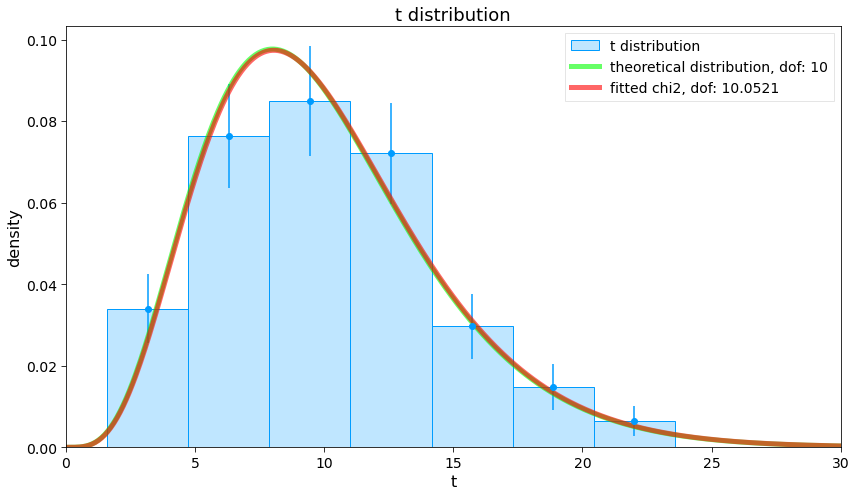

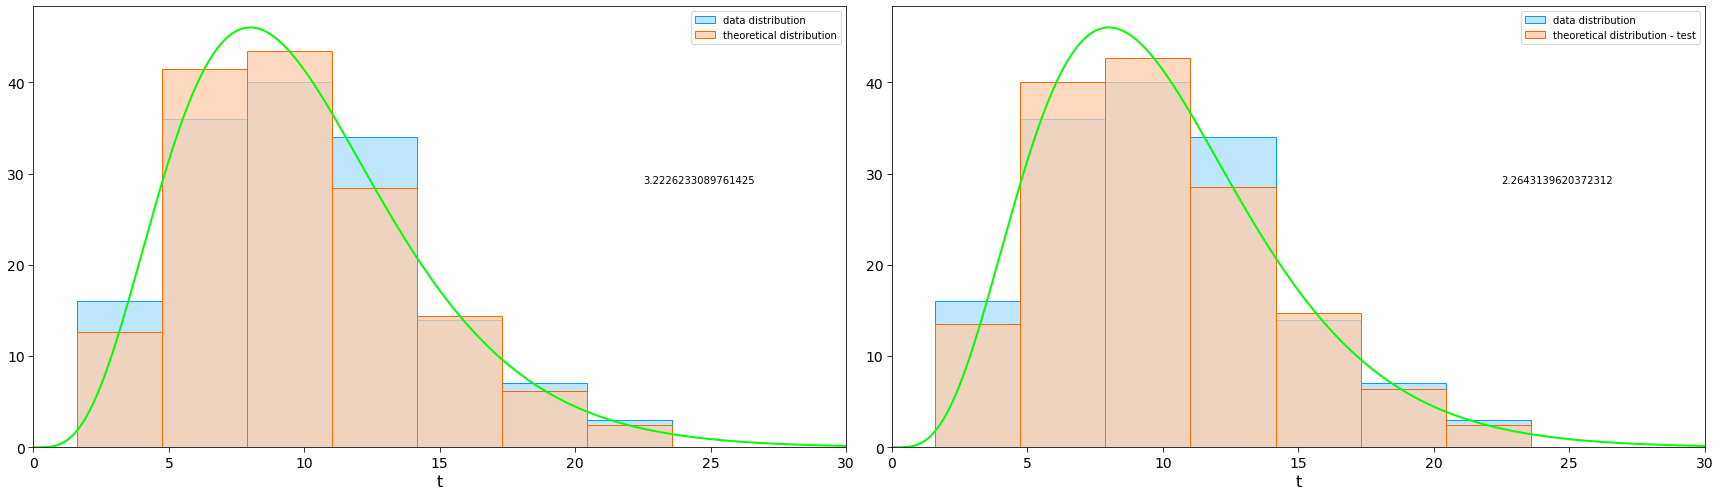

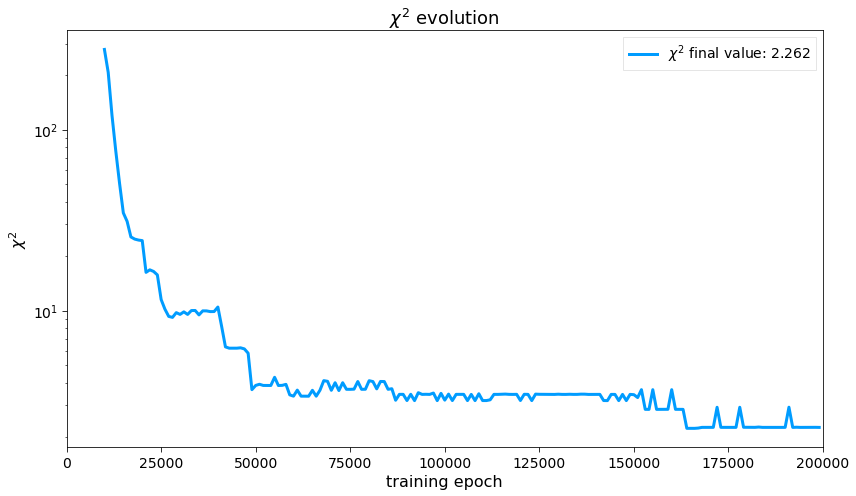

In [8]:
tDist.plotTdist()
tDist.plotHist()
tDist.plotChi2History()